In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [21]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters
input_size = 784  # 28 * 28
hidden_size = 100
num_classes = 10
n_epochs = 2
batch_size = 100
learning_rate = 0.01

In [22]:
# load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size,
                                          shuffle=True)

In [23]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


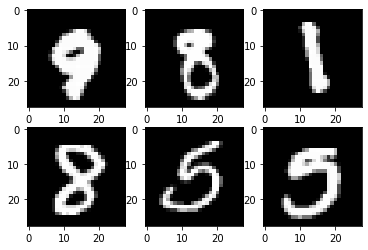

In [24]:
for i in range(1, 7):
    plt.subplot(2, 3, i*1)
    plt.imshow(samples[i][0], cmap='gray')

## Construct Neural Network

In [25]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out 
    # Note that since it's a multi classification
    # We don't need to apply a softmax function here
    # but if it's a binary classification one we need to apply a sigmoid function here

model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
# Training loop
n_total_steps = len(train_loader)

for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader): # 100, 1, 28, 28
        # 100, 1, 28, 28 --> 10, 784
        images = images.reshape(-1, 28 * 28).to(device) # push to device
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        loss.backward()
        optimizer.step()
        
        # zero gradients
        optimizer.zero_grad()
        
        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1} / {n_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}")

epoch 1 / 2, step 100 / 600, loss = 0.3200
epoch 1 / 2, step 200 / 600, loss = 0.1860
epoch 1 / 2, step 300 / 600, loss = 0.1859
epoch 1 / 2, step 400 / 600, loss = 0.1382
epoch 1 / 2, step 500 / 600, loss = 0.1326
epoch 1 / 2, step 600 / 600, loss = 0.1050
epoch 2 / 2, step 100 / 600, loss = 0.0720
epoch 2 / 2, step 200 / 600, loss = 0.0533
epoch 2 / 2, step 300 / 600, loss = 0.0693
epoch 2 / 2, step 400 / 600, loss = 0.0336
epoch 2 / 2, step 500 / 600, loss = 0.1335
epoch 2 / 2, step 600 / 600, loss = 0.1362


In [27]:
# testing
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, preds = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f"accuracy = {acc}")

accuracy = 96.31
